### STFT / ISTFT practice using librosa library

In [13]:
import os

Data_path = os.path.pardir
Data_path += "/Data/sample/"
for music in os.listdir(Data_path) : 
    print(music)
Data_path += os.listdir(Data_path)[0]
Data_path = os.path.abspath(Data_path)

Hardwell feat. Amba Shepherd - United We Are (OUT NOW!) #UnitedWeAre.mp3
Jonas Blue - Fast Car ft. Dakota (Official Video).mp3


In [14]:
import librosa

y, sr = librosa.load(Data_path, mono=False)
print(type(y), type(sr))
print(len(y), sr)

<class 'numpy.ndarray'> <class 'int'>
2 22050


In [15]:
print(len(y[0]), sr)
y = y[:,:int(7716865 / 100)]
print(len(y[0]), sr)

7716865 22050
77168 22050


In [16]:
from IPython.display import Audio

Audio(data=y, rate=sr)

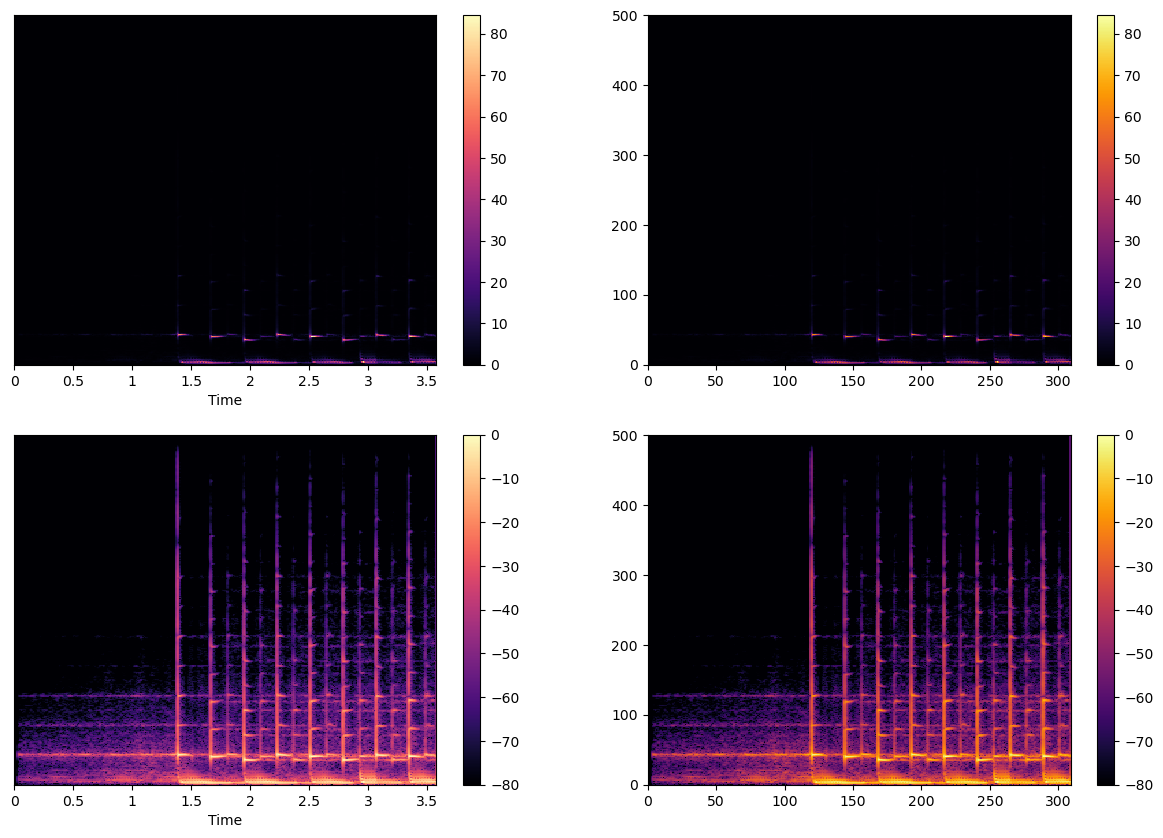

In [17]:
import numpy as np
import matplotlib.pyplot as plt

D = librosa.stft(y[0], n_fft=1000, )
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
D = np.abs(D)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

colorbar = librosa.display.specshow(D, x_axis="time", sr=sr * 2, ax=axes[0,0])
plt.colorbar(colorbar)

colorbar = axes[0,1].pcolormesh(D, cmap="inferno")
plt.colorbar(colorbar)

colorbar = librosa.display.specshow(S_db, x_axis="time", sr=sr * 2, ax=axes[1,0])
plt.colorbar(colorbar)

colorbar = axes[1,1].pcolormesh(S_db, cmap="inferno")
plt.colorbar(colorbar)
plt.show()

(501, 309)


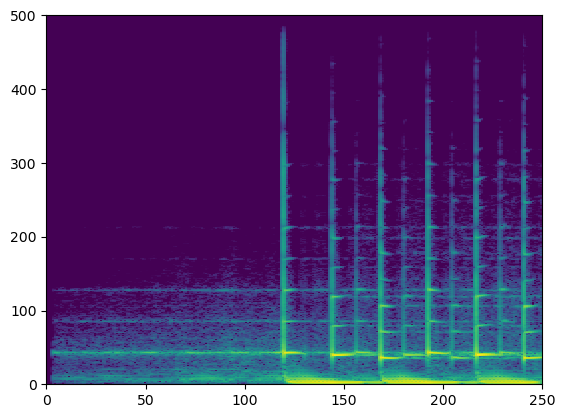

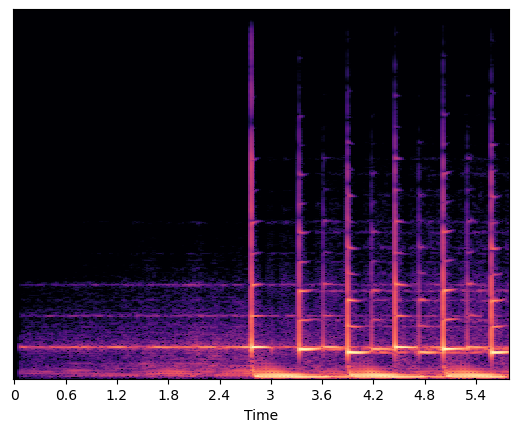

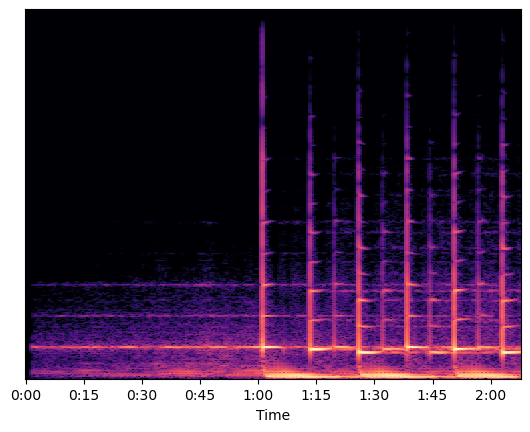

In [18]:
print(S_db.shape)
plt.pcolormesh(S_db[:,:int(len(S_db) / 2)])
plt.show()
librosa.display.specshow(S_db[:,:int(len(S_db) / 2)], x_axis="time", sr=sr)
plt.show()
librosa.display.specshow(S_db[:,:int(len(S_db) / 2)], x_axis="time", sr=1000)
plt.show()

In [28]:
from IPython.display import Audio

D = librosa.stft(y[0], n_fft=1000, )
D_inverse = librosa.istft(D, n_fft=1000)
display(Audio(data=D_inverse, rate=sr))

S_db_inverse = librosa.istft(S_db, n_fft=1000)
display(Audio(data=S_db_inverse, rate=sr))

S_db_inverse = librosa.db_to_amplitude(S_db, ref=2)
S_db_inverse = librosa.istft(S_db_inverse, n_fft=1000)
display(Audio(data=S_db_inverse, rate=sr))


In [6]:
print(librosa.amplitude_to_db.__doc__)

Convert an amplitude spectrogram to dB-scaled spectrogram.

    This is equivalent to ``power_to_db(S**2, ref=ref**2, amin=amin**2, top_db=top_db)``,
    but is provided for convenience.

    Parameters
    ----------
    S : np.ndarray
        input amplitude

    ref : scalar or callable
        If scalar, the amplitude ``abs(S)`` is scaled relative to ``ref``:
        ``20 * log10(S / ref)``.
        Zeros in the output correspond to positions where ``S == ref``.

        If callable, the reference value is computed as ``ref(S)``.

    amin : float > 0 [scalar]
        minimum threshold for ``S`` and ``ref``

    top_db : float >= 0 [scalar]
        threshold the output at ``top_db`` below the peak:
        ``max(20 * log10(S/ref)) - top_db``

    Returns
    -------
    S_db : np.ndarray
        ``S`` measured in dB

    See Also
    --------
    power_to_db, db_to_amplitude

    Notes
    -----
    This function caches at level 30.
    
